<a href="https://colab.research.google.com/github/Mahwaya/Data-Journey-IBM-Data-Science-Professional-Certificate-Full-Course-/blob/main/Percival_Mahwaya_41701_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: **Implementing a Multilayer Perceptron (MLP)**
## Student **|** ID: **Percival Mahwaya | 41701**
## Subject: **Advanced AI Methods of AI**
## Department: **Applied Sciences	| Computer Science II (Data Scientist)**
## Professor: **dr in˙z. Godlove Kuaban**

# This lab is about implementing a Multilayer Perceptron (MLP) with TensorFlow

I implemented, trained, and evaluated an MLP for:
- Classification on MNIST (10 classes) as per instructions
- Regression on the Linnerud dataset (3 inputs, 3 outputs)

I also compared Adam vs SGD for both models.


## Task 1: Classification using MNIST

Goal:
- Loading the MNIST
- Normalizing pixel values
- Flattening 28x28 into 784 features
- Building an MLP with at least two hidden layers
- Training with Adam and sparse categorical crossentropy
- Recording training and validation accuracy and loss


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

tf.keras.utils.set_random_seed(42)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("x_train:", x_train.shape, "y_train:", y_train.shape)
print("x_test:", x_test.shape, "y_test:", y_test.shape)
print("labels:", tf.unique(y_train).y.numpy()[:10])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train: (60000, 28, 28) y_train: (60000,)
x_test: (10000, 28, 28) y_test: (10000,)
labels: [5 0 4 1 9 2 3 6 7 8]


In [2]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

print("x_train reshaped:", x_train.shape)
print("x_test reshaped:", x_test.shape)


x_train reshaped: (60000, 784)
x_test reshaped: (10000, 784)


In [3]:
from tensorflow.keras import layers, models

mnist_model_adam = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

mnist_model_adam.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
mnist_model_adam.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)


In [5]:
history_mnist_adam = mnist_model_adam.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8475 - loss: 0.5256 - val_accuracy: 0.9643 - val_loss: 0.1162
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9628 - loss: 0.1266 - val_accuracy: 0.9717 - val_loss: 0.0900
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9773 - loss: 0.0783 - val_accuracy: 0.9738 - val_loss: 0.0838
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9848 - loss: 0.0536 - val_accuracy: 0.9740 - val_loss: 0.0865
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9892 - loss: 0.0376 - val_accuracy: 0.9743 - val_loss: 0.0921
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9922 - loss: 0.0272 - val_accuracy: 0.9742 - val_loss: 0.0891
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9947 - loss: 0.0198 - val_accuracy: 0.9740 - val_loss: 0.0921
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9960 - loss: 0.0155 - val_accuracy: 0

In [6]:
mnist_test_loss_adam, mnist_test_acc_adam = mnist_model_adam.evaluate(x_test, y_test, verbose=0)

print(f"MNIST test loss (Adam): {mnist_test_loss_adam:.4f}")
print(f"MNIST test accuracy (Adam): {mnist_test_acc_adam:.4f}")


MNIST test loss (Adam): 0.1030
MNIST test accuracy (Adam): 0.9740


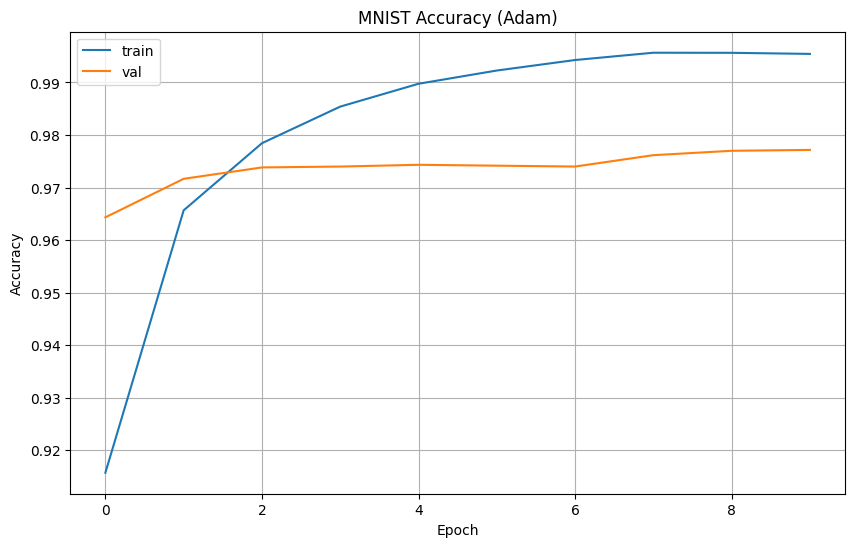

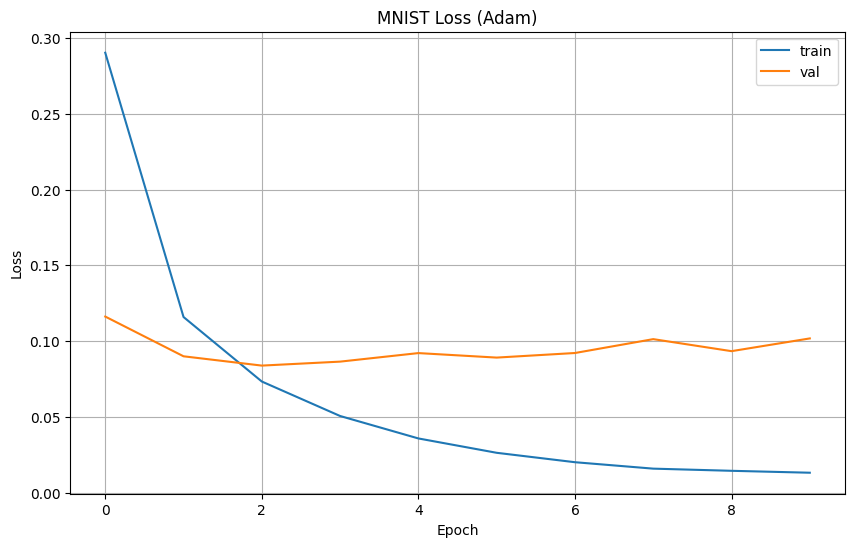

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(history_mnist_adam.history["accuracy"])
plt.plot(history_mnist_adam.history["val_accuracy"])
plt.title("MNIST Accuracy (Adam)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(history_mnist_adam.history["loss"])
plt.plot(history_mnist_adam.history["val_loss"])
plt.title("MNIST Loss (Adam)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.grid(True)
plt.show()


## Interpretation of the results. MNIST classification (Adam)

I was training an MLP on MNIST with Adam for 10 epochs.

I was reaching:
- Test loss (Adam): 0.1030
- Test accuracy (Adam): 0.9740

I was watching the learning curves:
- I was seeing accuracy rising fast in the first few epochs, then flattening.
- I was seeing validation accuracy tracking training accuracy closely, so I was reading overfitting as low in this run.
- I was treating the loss curve as a quick check that the model was still learning and not getting stuck.


## Task 2: Regression using the Linnerud dataset

Goal:
- Loading Linnerud (3 exercise features -> 3 physiological outputs)
- Spliting into train and test
- Standardizing features and targets
- Building an MLP regressor (output layer: 3 neurons, linear)
- Training with Adam and MSE
- Recording training and validation loss


In [8]:
import numpy as np
from sklearn.datasets import load_linnerud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

lin = load_linnerud()
X = lin.data
y = lin.target

print("X shape:", X.shape)
print("y shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_s = scaler_X.fit_transform(X_train)
X_test_s = scaler_X.transform(X_test)

y_train_s = scaler_y.fit_transform(y_train)
y_test_s = scaler_y.transform(y_test)

print("X_train_s:", X_train_s.shape, "X_test_s:", X_test_s.shape)
print("y_train_s:", y_train_s.shape, "y_test_s:", y_test_s.shape)


X shape: (20, 3)
y shape: (20, 3)
X_train_s: (16, 3) X_test_s: (4, 3)
y_train_s: (16, 3) y_test_s: (4, 3)


In [9]:
lin_model_adam = models.Sequential([
    layers.Input(shape=(3,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(3, activation="linear")
])

lin_model_adam.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss="mse"
)

lin_model_adam.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,435 (9.51 KB)

 Trainable params: 2,435 (9.51 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history_lin_adam = lin_model_adam.fit(
    X_train_s, y_train_s,
    epochs=200,
    batch_size=4,
    validation_split=0.2,
    verbose=1
)


Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - loss: 1.3354 - val_loss: 0.5076
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 1.2631 - val_loss: 0.5050
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.2117 - val_loss: 0.5039
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.1681 - val_loss: 0.5041
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 1.1314 - val_loss: 0.5056
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.1000 - val_loss: 0.5074
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1.0727 - val_loss: 0.5094
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.0487 - val_loss: 0.5117
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.0276 - val_loss: 0.5143
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 1.0092 - val_loss: 0.5173
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.9926 - val_loss: 0.5207
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.9774 - val_l

Linnerud test MSE (Adam, scaled): 1.4139


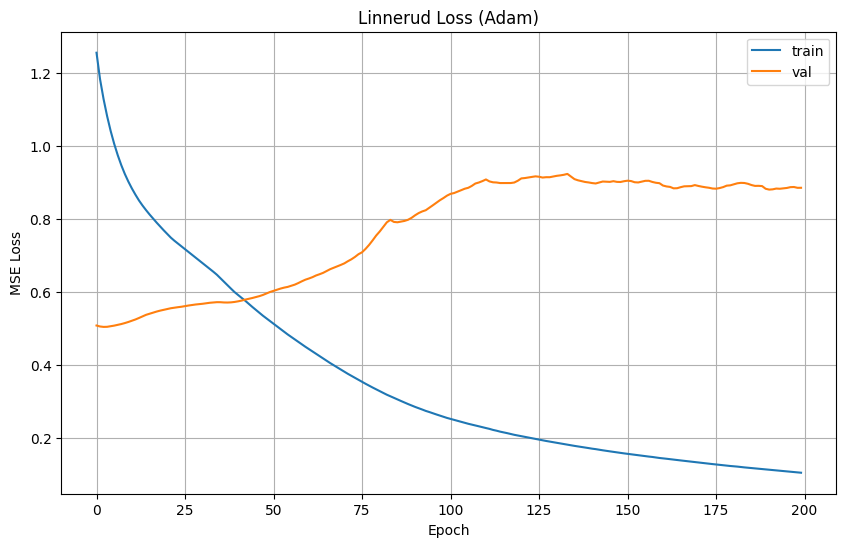

In [11]:
lin_test_mse_adam = lin_model_adam.evaluate(X_test_s, y_test_s, verbose=0)
print(f"Linnerud test MSE (Adam, scaled): {lin_test_mse_adam:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(history_lin_adam.history["loss"])
plt.plot(history_lin_adam.history["val_loss"])
plt.title("Linnerud Loss (Adam)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend(["train", "val"])
plt.grid(True)
plt.show()


## Interpretation of results. Linnerud regression (Adam, scaled)

I was training an MLP for multi output regression on the Linnerud dataset.

I was working with a small dataset split:
- I was training on 16 samples.
- I was testing on 4 samples.

I was scaling inputs and targets:
- I was standardizing X and y before training.

I was reaching:
- Linnerud test MSE (Adam, scaled): 1.4139

I was reading the loss curves:
- I was seeing training loss dropping much faster than validation loss.
- I was treating the gap between train and validation loss as overfitting driven by small data and a model that was too flexible for this dataset size.


## Task 3: Optimizer experimentation (Adam vs SGD)

Plan:
- Keep the same architectures.
- Replace Adam with SGD.
- Retrain both models.
- Compare convergence and final metrics:
  - MNIST: accuracy and loss
  - Linnerud: MSE loss


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Re-load MNIST here to avoid any overwritten y_train/y_test from earlier cells
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tf.keras.datasets.mnist.load_data()

x_train = x_train_raw.astype("float32") / 255.0
x_test = x_test_raw.astype("float32") / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

y_train = y_train_raw.astype("int64")
y_test = y_test_raw.astype("int64")

print("x_train:", x_train.shape, "y_train:", y_train.shape)
print("x_test:", x_test.shape, "y_test:", y_test.shape)

assert x_train.shape[0] == y_train.shape[0]
assert x_test.shape[0] == y_test.shape[0]

tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(42)

mnist_model_sgd = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

mnist_model_sgd.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

history_mnist_sgd = mnist_model_sgd.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

mnist_test_loss_sgd, mnist_test_acc_sgd = mnist_model_sgd.evaluate(x_test, y_test, verbose=0)
print(f"MNIST test loss (SGD): {mnist_test_loss_sgd:.4f}")
print(f"MNIST test accuracy (SGD): {mnist_test_acc_sgd:.4f}")


x_train: (60000, 784) y_train: (60000,)
x_test: (10000, 784) y_test: (10000,)
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5146 - loss: 1.7365 - val_accuracy: 0.8807 - val_loss: 0.5573
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8563 - loss: 0.5636 - val_accuracy: 0.9122 - val_loss: 0.3541
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8874 - loss: 0.4120 - val_accuracy: 0.9217 - val_loss: 0.2959
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8990 - loss: 0.3559 - val_accuracy: 0.9267 - val_loss: 0.2663
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9075 - loss: 0.3236 - val_accuracy: 0.9302 - val_loss: 0.2469
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9137 - loss: 0.3007 - val_accuracy: 0.9335 - val_loss: 0.2322
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9192 - loss: 0.2828 - val_accuracy: 0.9370 - val_loss: 0.2202
Epoch 8/10
422/422 ━━━━━━━

In [15]:
# Re-evaluate Adam model on the same x_test/y_test used above (if the model exists)
if "mnist_model_adam" in globals():
    mnist_test_loss_adam, mnist_test_acc_adam = mnist_model_adam.evaluate(x_test, y_test, verbose=0)
    print("MNIST comparison")
    print(f"Adam test loss: {mnist_test_loss_adam:.4f} | test accuracy: {mnist_test_acc_adam:.4f}")
    print(f"SGD  test loss: {mnist_test_loss_sgd:.4f} | test accuracy: {mnist_test_acc_sgd:.4f}")
else:
    print("mnist_model_adam not found. Run the Adam training cells first.")


MNIST comparison
Adam test loss: 0.1030 | test accuracy: 0.9740
SGD  test loss: 0.2278 | test accuracy: 0.9347


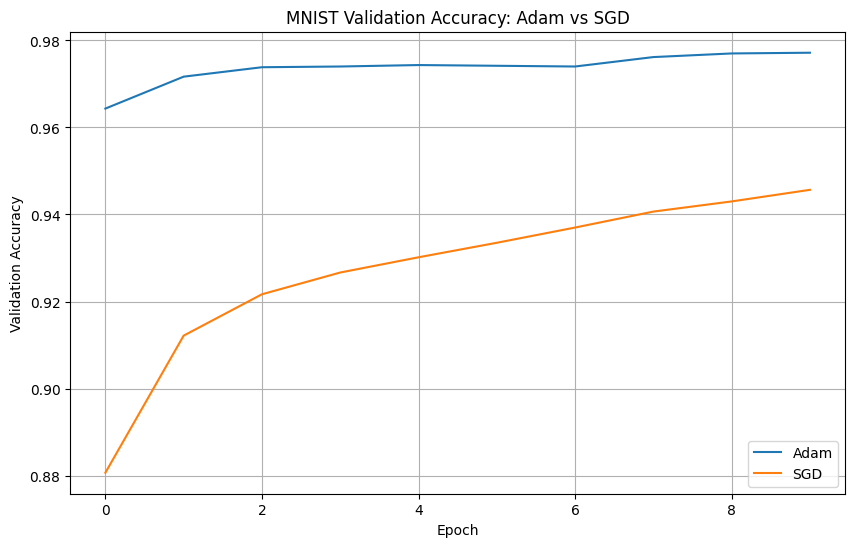

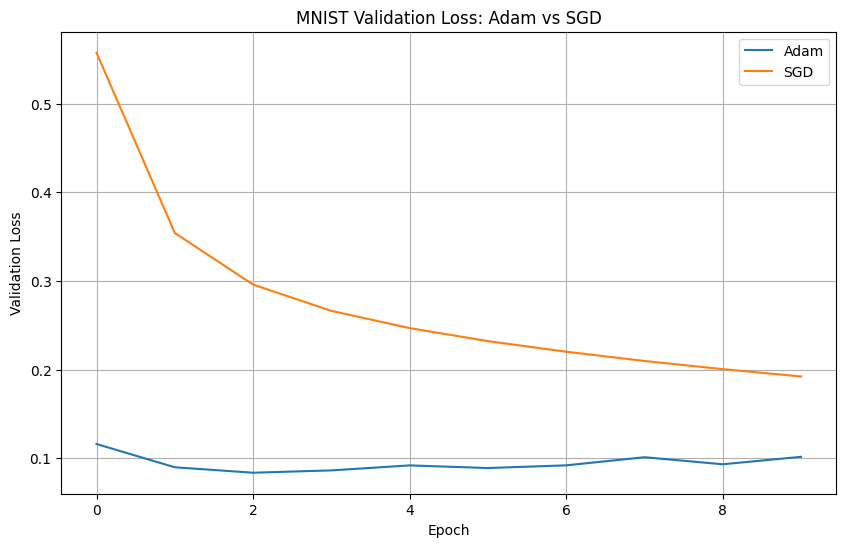

In [17]:
import matplotlib.pyplot as plt

if "history_mnist_adam" in globals():
    plt.figure(figsize=(10, 6))
    plt.plot(history_mnist_adam.history["val_accuracy"])
    plt.plot(history_mnist_sgd.history["val_accuracy"])
    plt.title("MNIST Validation Accuracy: Adam vs SGD")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Accuracy")
    plt.legend(["Adam", "SGD"])
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(history_mnist_adam.history["val_loss"])
    plt.plot(history_mnist_sgd.history["val_loss"])
    plt.title("MNIST Validation Loss: Adam vs SGD")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Loss")
    plt.legend(["Adam", "SGD"])
    plt.grid(True)
    plt.show()
else:
    print("history_mnist_adam not found. Run the Adam training cells first.")


## Optimizer comparison. Adam vs SGD (MNIST)

I was keeping the MNIST architecture and training setup consistent, then I was swapping the optimizer.

I was getting these test results:
- Adam: test loss 0.1030, test accuracy 0.9740
- SGD: test loss 0.2278, test accuracy 0.9347

I was observing:
- I was seeing Adam converge faster within 10 epochs.
- I was seeing SGD improve more slowly and finish at lower accuracy with the same epoch budget and learning rate.


## Conclusion and key lessons learned

I was implementing two MLP workflows in TensorFlow:
- I was doing MNIST classification.
- I was doing Linnerud multi output regression.

I was learning from the outcomes:
- I was seeing Adam reach higher MNIST accuracy faster than SGD in the same 10 epochs.
- I was seeing the Linnerud model overfit early due to the small dataset.

I was taking away next steps for stronger results:
- I was planning to reduce model size for Linnerud.
- I was planning to add regularization and early stopping.
- I was planning to tune SGD learning rate and try momentum, then re-run the same comparisons.
